This is a step-by-step example of watershed segmentaion with seeds.

Codes are adapted from https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

Image is from "3D Clumped Cell Segmentation Using Curvature
Based Seeded Watershed"

In [ ]:
# Set up
import numpy as np
import cv2 as cv
import urllib.request
from matplotlib import pyplot as plt

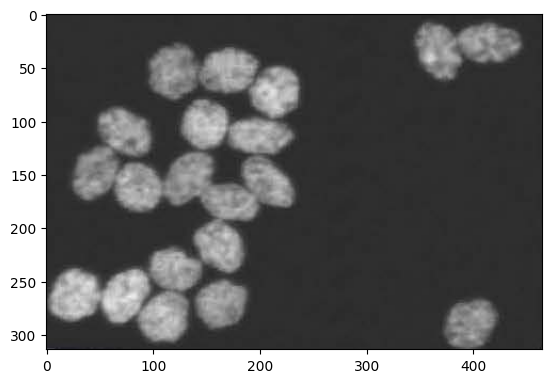

(314, 465, 3)


In [ ]:
# Load the image to be segmented
with urllib.request.urlopen('https://finspire13.github.io/jimaging-02-00031-v2.jpg') as req:
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv.imdecode(arr, -1) # Load as it is
    # import pdb;pdb.set_trace()
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(img.shape)

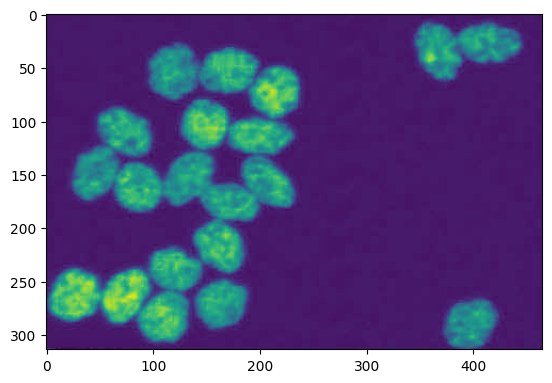

(314, 465)


In [ ]:
# Convert to grayscale image
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()
print(gray.shape)

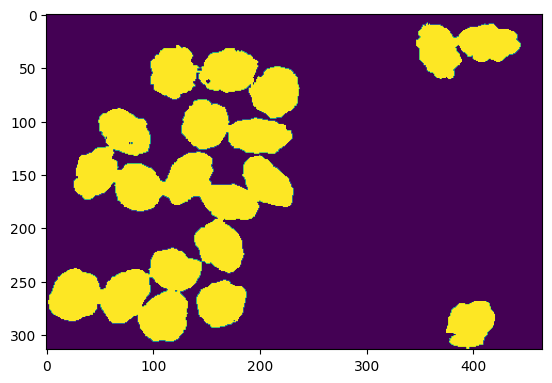

In [ ]:
# Thresholding with the adaptive OTSU approach
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

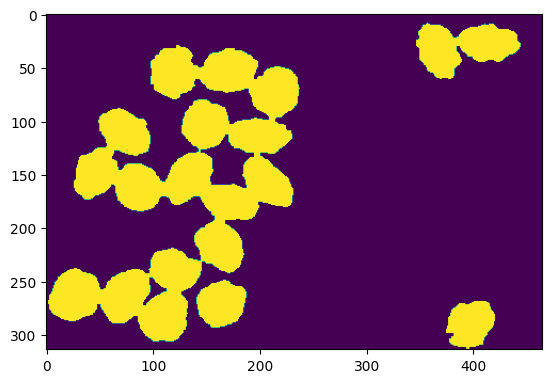

In [ ]:
# Fill holes with morphology
kernel = np.ones((3,3),np.uint8)
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations = 1)
plt.imshow(closing)
plt.show()

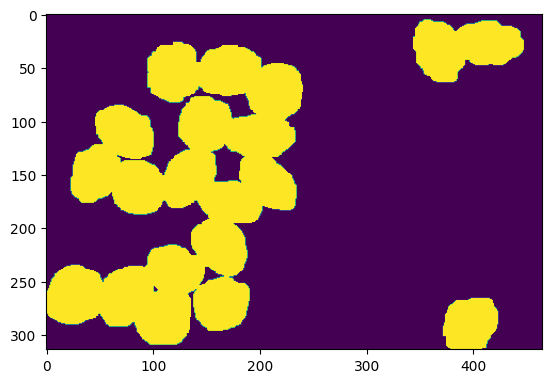

In [ ]:
# Find sure background area by dilation
kernel = np.ones((3,3),np.uint8)
sure_bg = cv.dilate(closing, kernel, iterations=3)
plt.imshow(sure_bg)
plt.show()

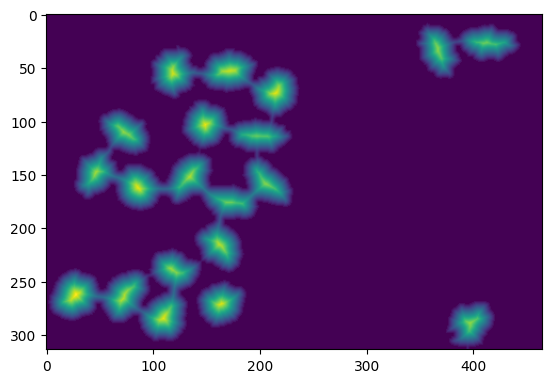

In [ ]:
# Distance transform
dist_transform = cv.distanceTransform(closing,cv.DIST_L2,5)
plt.imshow(dist_transform)
plt.show()

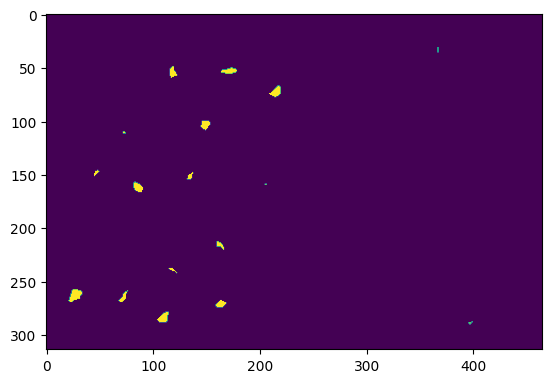

In [ ]:
# Find sure foreground area
ret, sure_fg = cv.threshold(dist_transform,0.8*dist_transform.max(),255,0)
plt.imshow(sure_fg)
plt.show()

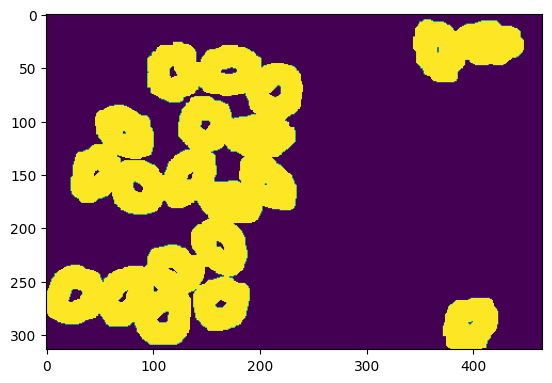

In [ ]:
# Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown)
plt.show()

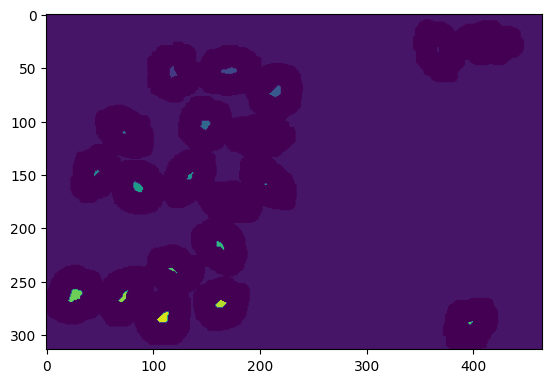

In [ ]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)
plt.show()

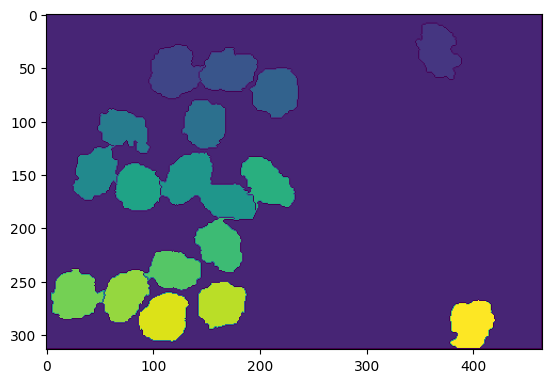

In [ ]:
# Watershed with markers
markers = cv.watershed(img,markers)
plt.imshow(markers)
plt.show()

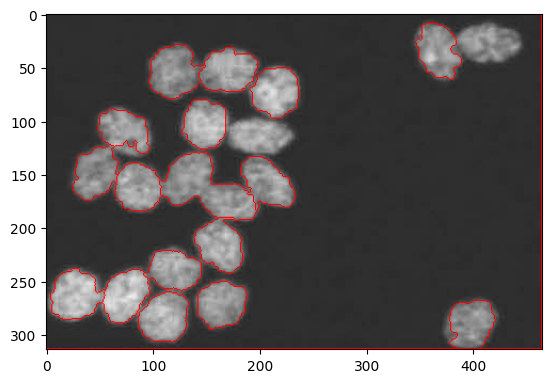

In [ ]:
# Visualize results
img[markers == -1] = [255,0,0] # Boundaries
plt.imshow(img)
plt.show()

**Practice Question:**

1. Some objects are missing in the segmentaiton result above. Try to tune the parameters to include these objects. When you tune the parameters, inpect the intermediate results to see how they change. (Hint: Try to find more sure foreground areas)

2. How about using local minima pixels in the images as water sources (seeds) in a naive way? Think about what will happen. (Hint: The number of seeds = The number of segments in the result)